## 7.8.1, 7.8.2 Lab: Nonlinear Modeling, Splines

In [2]:
library(ISLR)
attach(Wage)

In [4]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

In [6]:
Wage[1:5,]

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315


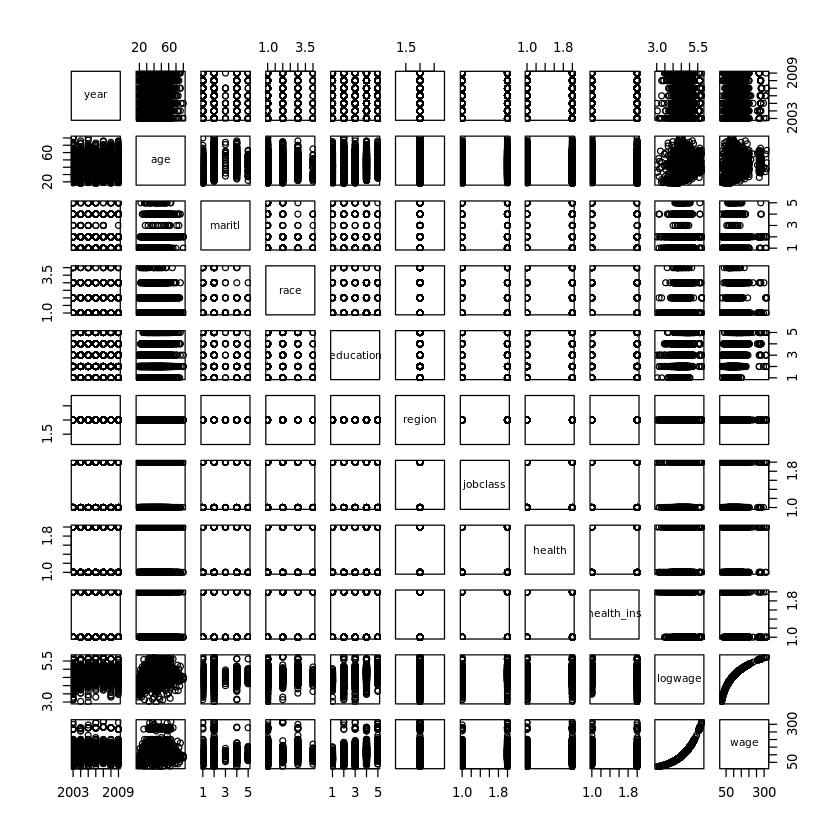

In [11]:
pairs(Wage)

We create a polynomial regression line using just age, so the form of our model looks like:
$$ Y = \beta_0 + \beta_1*age + \beta_2 * age^2 + \beta_3 * age^3 + \beta_4 * age^4 $$

In [12]:
polyRegressionFit = lm(wage~poly(age, 4), data=Wage)

In [25]:
summary(polyRegressionFit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = TRUE)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = TRUE)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = TRUE)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = TRUE)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


These values are really big! This is because we are finding a basis of orthogonal polynomials (each column is a linear combination of the variables $age$, $age^2$, ...) We can turn this off using ```raw=TRUE```

In [23]:
polyRegressionFit = lm(wage~poly(age, 4, raw=TRUE), data=Wage)
summary(polyRegressionFit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = TRUE)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = TRUE)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = TRUE)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = TRUE)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


Not that this will be the exact same as just a linear regression with the polynomial degrees as predictors:

In [22]:
linearRegressionFit = lm(wage~age+I(age^2)+I(age^3)+I(age^4), data=Wage)
summary(linearRegressionFit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
age,2.124552e+01,5.886748e+00,3.609042,0.0003123618
I(age^2),-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
I(age^3),6.810688e-03,3.065931e-03,2.221409,0.0263977518
I(age^4),-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


aaand again.

In [27]:
linearRegressionFit2 = lm(wage~cbind(age, age^2, age^3, age^4), data=Wage)
summary(linearRegressionFit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
age,2.124552e+01,5.886748e+00,3.609042,0.0003123618
I(age^2),-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
I(age^3),6.810688e-03,3.065931e-03,2.221409,0.0263977518
I(age^4),-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [83]:
max(age)
age.grid

[1] 80

[1] 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
[26] 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
[51] 68 69 70 71 72 73 74 75 76 77 78 79 80

In [35]:
age.grid = seq(min(age), max(age))
preds=predict(polyRegressionFit, newdata=list(age=age.grid), se=TRUE)

In [40]:
#puts the predictions next to the standard errors
se.bands=cbind(preds$fit + 2*preds$se.fit, preds$fit-2*preds$se.fit)

In [84]:
agelims

[1] 18 80

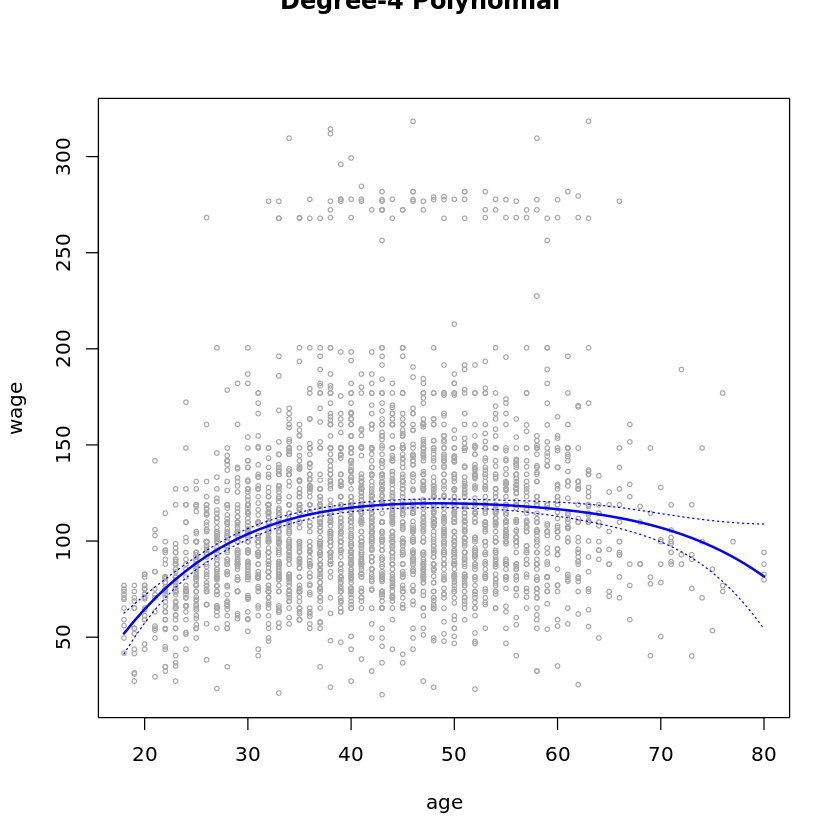

In [45]:
# par(mfrow=c(1,2), mar=c(4.5, 4.5, 1, 1), oma=c(0,0,4,0))
plot(age, wage, xlim=agelims, cex=.5, col="darkgrey")
title("Degree-4 Polynomial", outer=TRUE)
#plot the predictions
lines(age.grid, preds$fit, lwd=2, col="blue")
#plot the standard error
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

Note that using the prediction we made for the orthogonal set of basis functions will be the same thing as this--pred automatically handles the change in variables.

```anova()``` performs an analysis of variance. Let's fit a bunch of different models.

In [47]:
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2), data=Wage)
fit.3=lm(wage~poly(age,3), data=Wage)
fit.4=lm(wage~poly(age,4), data=Wage)
fit.5=lm(wage~poly(age,5), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


In [48]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Note that the p-values are the same and that the square of the t-statistics are equal to the F-statistics

We can also use ```anova()``` if we add on different terms in the model.

In [49]:
fit.1=lm(wage~education+age, data=Wage)
fit.2=lm(wage~education+poly(age,2), data=Wage)
fit.2=lm(wage~education+poly(age,3), data=Wage)
anova(fit.1, fit.2, fit.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2992,3719809,2,148183.8,59.59524,4.171965e-26
2996,4777674,-4,-1057865.8,212.72158,8.171737e-161


Alternatiely to ANOVA, we can use cross validation. Let's predict in an individual earns more than 250 per year.

In [61]:
polyRegressionFit = glm(I(wage>250)~poly(age,4), data=Wage, family=binomial)

In [62]:
preds = predict(polyRegressionFit, newdata=list(age=age.grid), se=T)

In [63]:
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
se.bands=exp(se.bands.logit)/(1+exp(se.bands.logit))
preds=predict(polyRegressionFit, newdata=list(age=age.grid),type="response", se=TRUE)

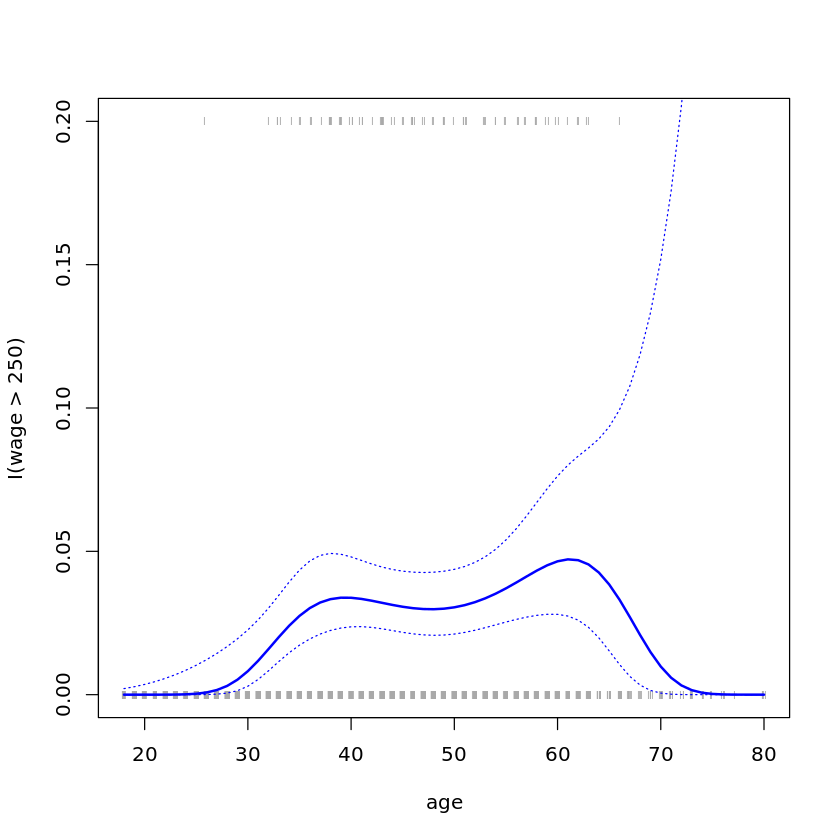

In [64]:
plot(age,I(wage>250), xlim=agelims, type="n", ylim=c(0,.2))
points(jitter(age), I((wage>250)/5), cex=.5, pch="l", col="darkgrey")
lines(age.grid, pfit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

To fit a step function, we can use the ```cut()``` function. We use this for splines (next up).

In [59]:
table(cut(age, 4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [60]:
fit=lm(wage~cut(age,4), data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


By using the ```bs()``` function, we generate the matrix of basis functions for the specified set of knots. We generate cubic splines by default.

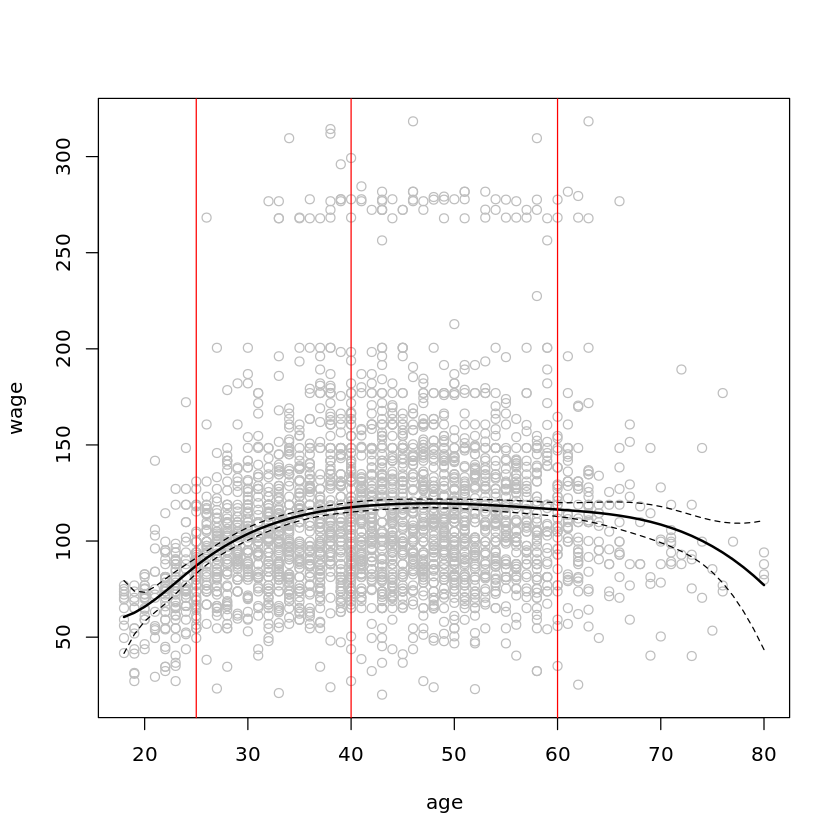

In [78]:
library(splines)
fit=lm(wage~bs(age, knots=c(25, 40, 60)), data=Wage)
pred=predict(fit, newdata=list(age=age.grid),se=TRUE)
plot(age, wage, col="gray")
lines(age.grid, pred$fit, lwd=2)
lines(age.grid, pred$fit+2*pred$se, lty="dashed")
lines(age.grid, pred$fit-2*pred$se, lty="dashed")
abline(v=25, col="red")
abline(v=40, col="red")
abline(v=60, col="red")

To use a natural spline:

In [82]:
list(age=age.grid)

$age
 [1] 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
[26] 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
[51] 68 69 70 71 72 73 74 75 76 77 78 79 80

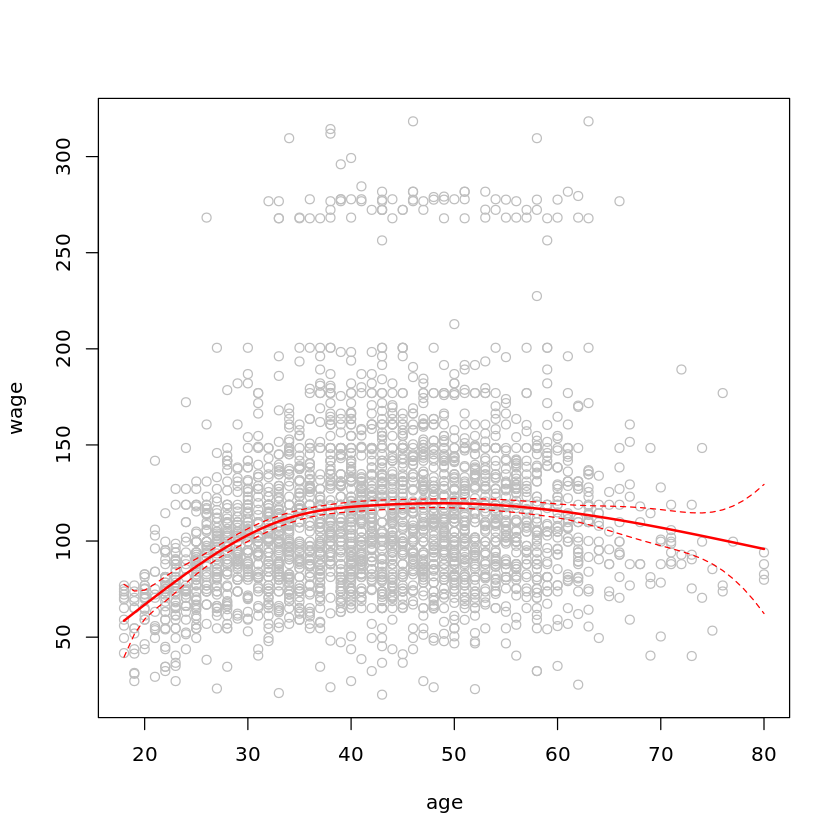

In [79]:
fit2 = lm(wage~ns(age, df=4), data=Wage)
pred2=predict(fit2, newdata=list(age = age.grid), se=TRUE)
plot(age, wage, col="gray")
lines(age.grid, pred2$fit, col="red", lwd=2)
lines(age.grid, pred2$fit+2*pred$se,col="red",  lty="dashed")
lines(age.grid, pred2$fit-2*pred$se,col="red",  lty="dashed")
# lines(age.grid, pred$fit, col="blue", lwd=2)
# lines(age.grid, pred$fit+2*pred$se, col="blue", lty="dashed")
# lines(age.grid, pred$fit-2*pred$se, col="blue", lty="dashed")

To use a smooth split, we use ```smooth.spline()```

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

[1] 6.794596

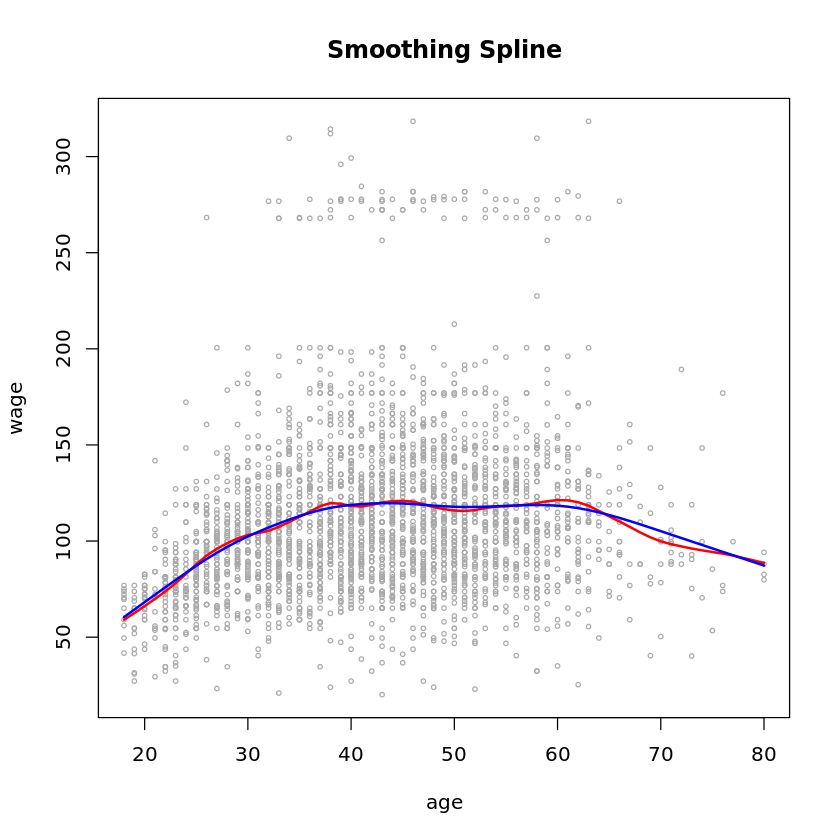

In [76]:
plot(age, wage, xlim=agelims, cex=.5, col="darkgrey")
title("Smoothing Spline")
fit=smooth.spline(age, wage, df=16)
fit2=smooth.spline(age, wage, cv=TRUE)
fit2$df
lines(fit, col="red",lwd=2)
lines(fit2, col="blue",lwd=2)

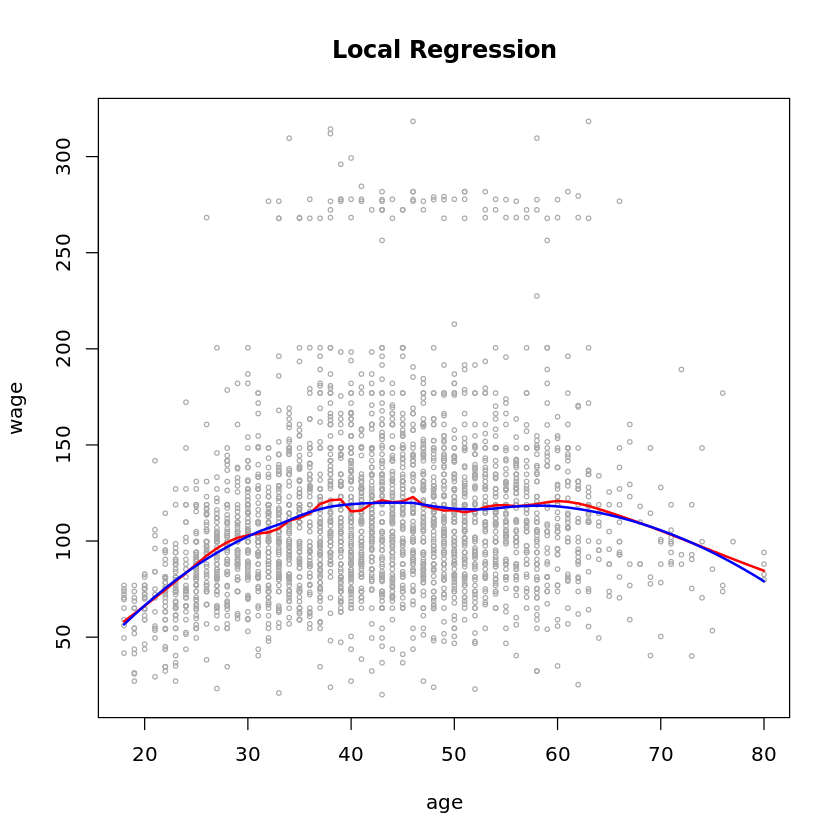

In [77]:
plot(age, wage, xlim=agelims, cex=.5, col="darkgrey")
title("Local Regression")
fit=loess(wage~age, span=.2, data=Wage)
fit2=loess(wage~age, span=.5, data=Wage)
lines(age.grid, predict(fit, data.frame(age=age.grid)), col="red",lwd=2)
lines(age.grid, predict(fit2, data.frame(age=age.grid)), col="blue",lwd=2)

In [86]:
?trees()